In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors
import warnings
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv(".\CareerMapping.csv")

In [3]:
y = data.pop("Role")

In [4]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y)


In [5]:
original_labels = label_encoder.classes_
label_mapping = {i: label for i, label in enumerate(original_labels)}
print(label_mapping)

{0: 'AI ML Specialist', 1: 'API Specialist', 2: 'Application Support Engineer', 3: 'Business Analyst', 4: 'Customer Service Executive', 5: 'Cyber Security Specialist', 6: 'Database Administrator', 7: 'Graphics Designer', 8: 'Hardware Engineer', 9: 'Helpdesk Engineer', 10: 'Information Security Specialist', 11: 'Networking Engineer', 12: 'Project Manager', 13: 'Software Developer', 14: 'Software tester', 15: 'Technical Writer'}


In [6]:
y_train_encoded

array([6, 6, 6, ..., 7, 7, 7])

In [7]:
x_train,x_temp,y_train,y_temp=train_test_split(data,y_train_encoded,test_size=0.5)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.6)

In [8]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(x_train, y_train)
y_train_pred = knn.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = knn.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(train_accuracy)
print(test_accuracy)

0.8919154499891043
0.8671023965141612


In [12]:
neighnour_number = [j for j in range(10,100,5)]
for i in neighnour_number:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_train_pred = knn.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_val_pred = knn.predict(x_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f" Train accuracy and Val accuracy for nearest neighbour {i} is {train_accuracy} and {val_accuracy}")

 Train accuracy and Val accuracy for nearest neighbour 10 is 0.9372412290259315 and 0.8867102396514162
 Train accuracy and Val accuracy for nearest neighbour 15 is 0.9045543691436043 and 0.8747276688453159
 Train accuracy and Val accuracy for nearest neighbour 20 is 0.8927870995859665 and 0.8687363834422658
 Train accuracy and Val accuracy for nearest neighbour 25 is 0.907387230333406 and 0.8932461873638344
 Train accuracy and Val accuracy for nearest neighbour 30 is 0.9241664850730007 and 0.9210239651416122
 Train accuracy and Val accuracy for nearest neighbour 35 is 0.928524733057311 and 0.9281045751633987
 Train accuracy and Val accuracy for nearest neighbour 40 is 0.9381128786227937 and 0.9395424836601307
 Train accuracy and Val accuracy for nearest neighbour 45 is 0.9453039877969056 and 0.94880174291939
 Train accuracy and Val accuracy for nearest neighbour 50 is 0.97036391370669 and 0.9662309368191722
 Train accuracy and Val accuracy for nearest neighbour 55 is 0.9697101765090433

In [9]:
knn = KNeighborsClassifier(n_neighbors=95)
knn.fit(x_train, y_train)
y_train_pred = knn.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = knn.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(train_accuracy)
print(test_accuracy)

0.986925256047069
0.9796659404502541


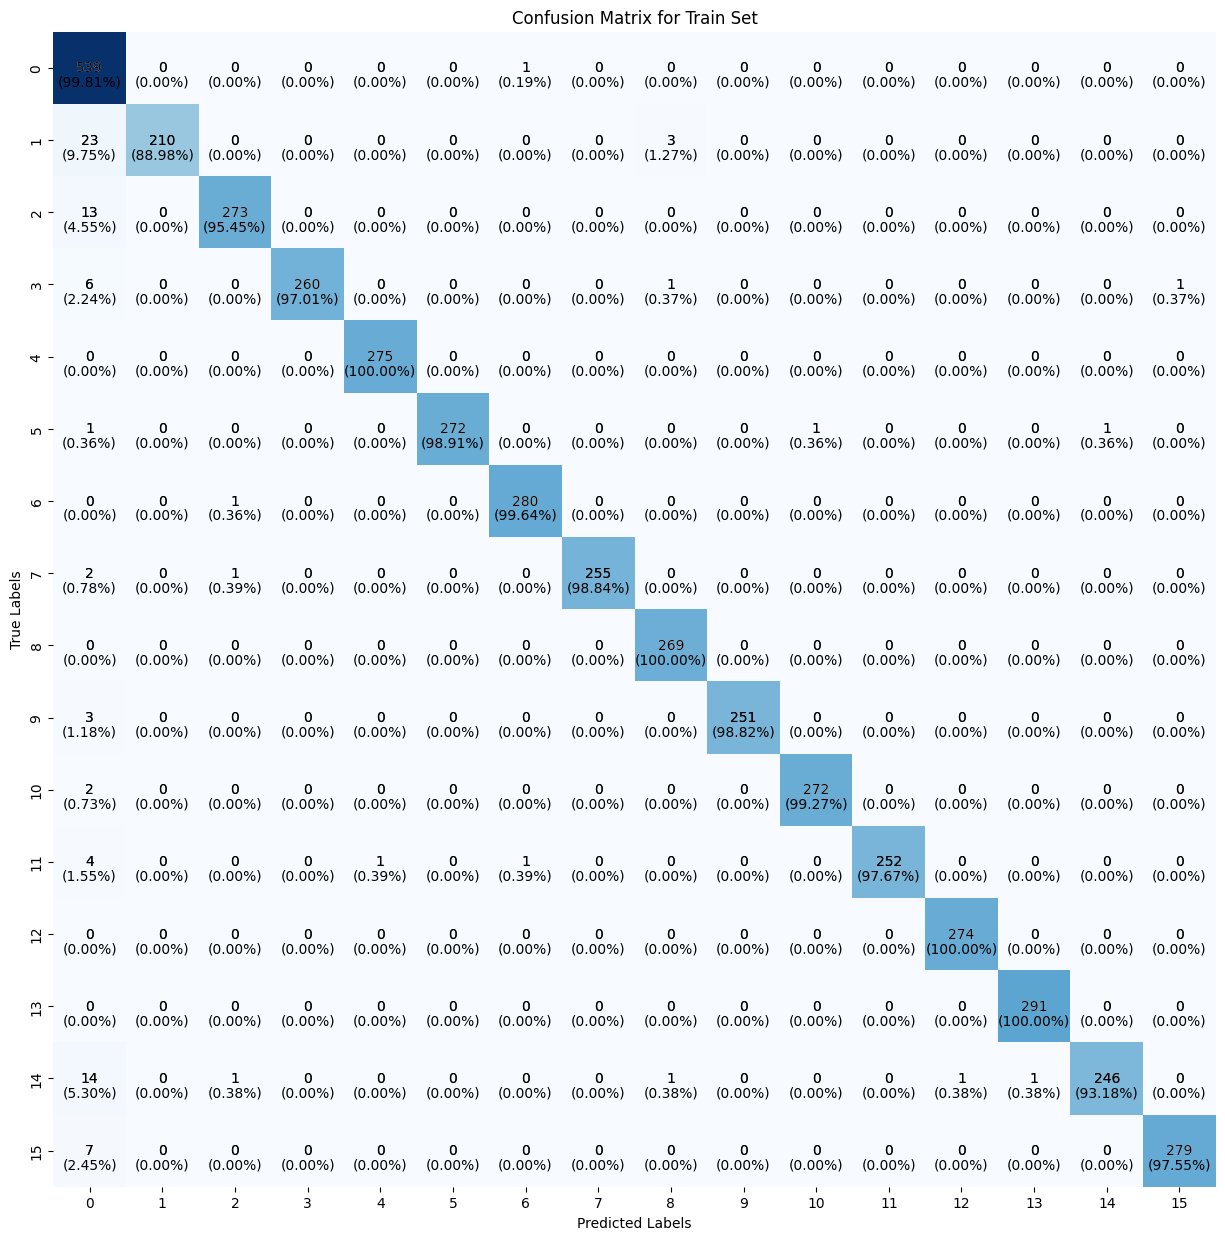

In [19]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Train Set')
plt.show()

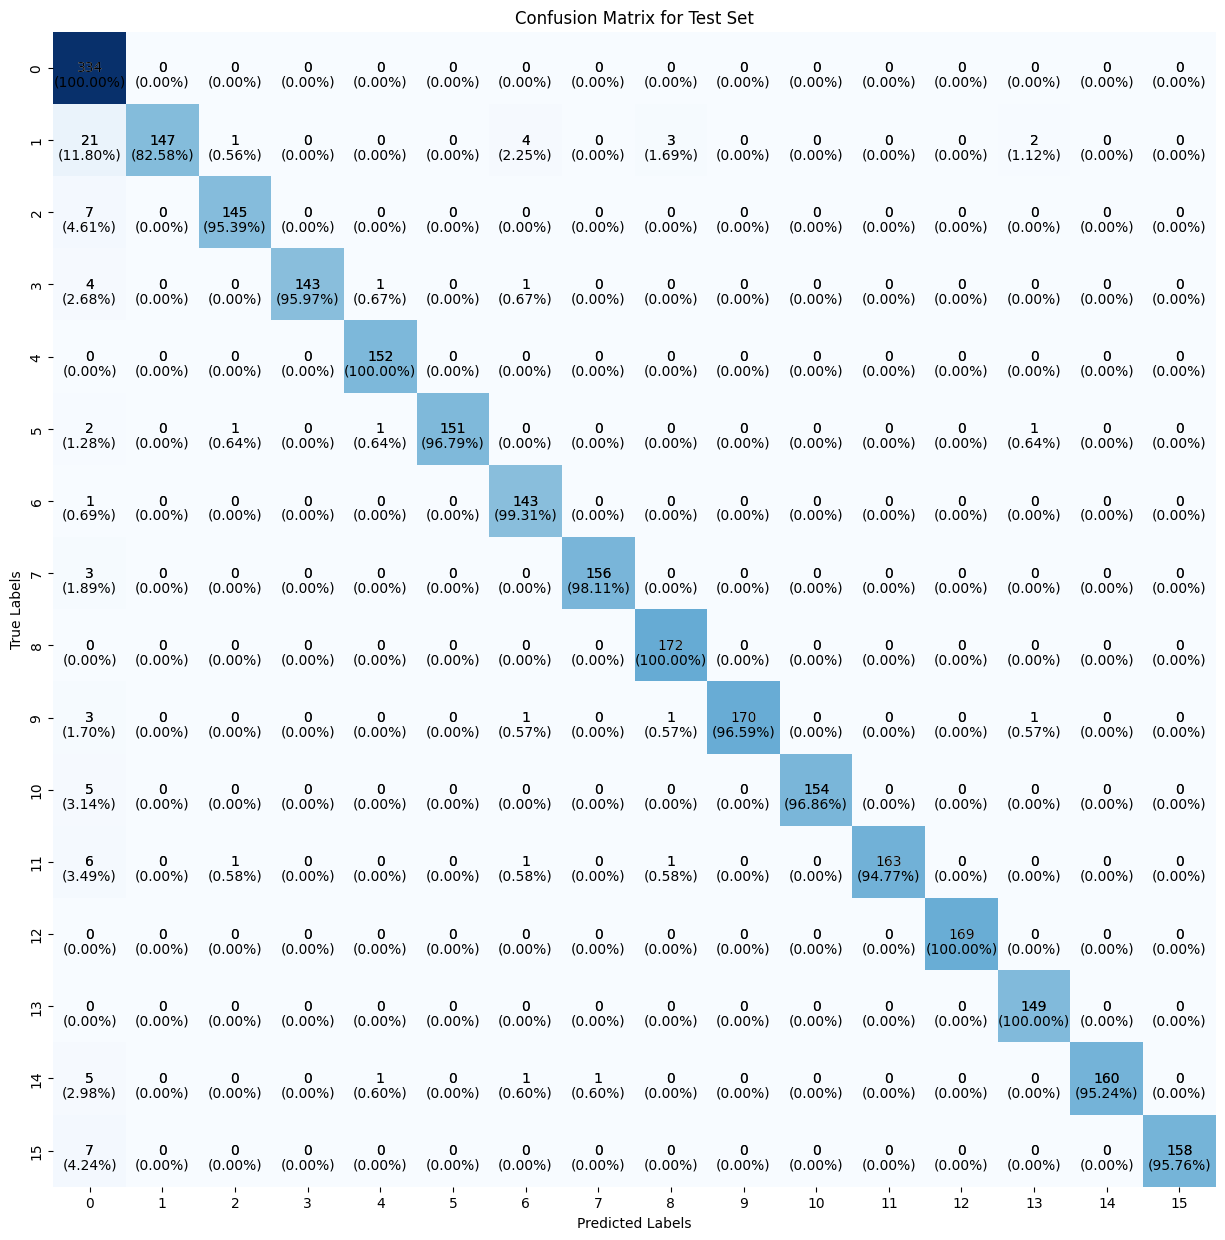

In [18]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()